In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

- This notebook is created as a project assignment, whihc was given by Techpro Ed, and with the help of Study Group Teammates and Ismet Gocer.

In [1]:
!pip install plotly
!pip install dash
!pip install wordcloud
!pip install cufflinks
!pip install missingno
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install yellowbrick

ERROR: Could not find a version that satisfies the requirement dash (from versions: none)
ERROR: No matching distribution found for dash
^C
ERROR: Operation cancelled by user


UnboundLocalError: local variable 'child' referenced before assignment

In [3]:
#Importing the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10, 6)

%matplotlib inline
plt.style.use('ggplot')
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz #figsize gibi işlem yapıyor görseli büyütmek için import ediyoruz altta 720, 3000 dedik
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #as model olur fakat literatür #lm = LinearRegression() #lm linear regresyon değişkeni
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import SCORERS
from sklearn.model_selection import cross_validate, cross_val_score 
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

# About Dataset

**EN:** This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This is a compiled version. This contains data over a period of 7 years (2014-2020). There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features. 

**TR:** Bu veri seti, arabalarin karbondioksit (CO2) emisyonlarının (salinimlarinin) farklı özelliklere göre nasıl değişebileceğini incelemektedir. Veri seti, Kanada Hükümeti resmi açık veri web sitesinden alınmış olup, 7 yıllık (2014-2020) dönemi kapsamaktadir. Toplam 7385 satır ve 12 sütun bulunmaktadır. 

**1. Make:** Company of the vehicle (Arac markasi)

**2. Model:** Car model

   **4WD/4X4:** Four-wheel drive (4 Ceker)

   **AWD:** All-wheel drive 

   **FFV:** Flexible-fuel vehicle

   **SWB:** Short wheelbase

   **LWB:** Long wheelbase

   **EWB:** Extended wheelbase

**3. Vehicle Class:** Class of vehicle depending on their utility, capacity and weight (small car, sports car, van, etc.)

**4.Engine Size:** Size of engine used in Litre (Motor hacmi)

**5. Cylinders:** Number of cylinders (Silindir sayisi)

**6. Transmission:** Transmission types and number of gears (Vites turu)

   **A:** automatic

   **AM:** automated manual

   **AS:** automatic with select shift

   **AV:** continuously variable

   **M:** manual

   **3-10:** Number of gears (vites sayisi)

**7. Fuel type:** Type of fuel used (Yakit turu)

   **X**: regular gasoline (Normal Bezin)

   **Z:** premium gasoline (Super Benzin)

   **D:** diesel (Mazot)

   **E:** ethanol (E85)

   **N:** natural gas

**Fuel consumption:**

**EN:** City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg).

**TR:** Şehir içi ve otoyol yakıt tüketimi değerleri 100 kilometrede litre (L/100 km) olarak gösterilir - kombine değer (%55 şehir içi, %45 otoyol) L/100 km ve İngiliz galonu başına mil (mpg) olarak gösterilir.

**8. Fuel Consumption City:** Fuel consumption in city roads (L/100 km)

**9. Fuel Consumption Hwy:** Fuel consumption in Hwy roads (L/100 km)

**10. Fuel Consumption Comb:** The combined fuel consumption (55% city, 45% highway) is shown in L/100 km

**11. Fuel Consumption Comb mpg:** The combined fuel consumption in both city and highway is shown in mile per gallon(mpg). (1 Galon yakit ile gidilen mile cinsinden yol mitari). (1 Galon = 3.78 Lt, 1 Mile = 1609.34 metre)

**12. CO2 Emissions(g/km): (Target Variable)** **EN:** The amount of CO2 a car emits into the atmosphere is measured in grams per kilometre - often shortened to g/km - which is considered to be a basic indication of a car's impact on the environment and air quality. 

**TR:** Bir otomobilin atmosfere saldığı CO2 miktarı, kilometre başına gram olarak ölçülür - genellikle g/km olarak kısaltılır - ve bu da bir otomobilin çevre ve hava kalitesi üzerindeki etkisinin temel bir göstergesi olarak kabul edilir.

For further (more) information:
https://www.kaggle.com/code/drfrank/co2-emission-eda-visualization-machine-learnin

https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles/code?datasetId=817556&sortBy=voteCount

# EDA

## Read Data

In [7]:
df = pd.read_csv('/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv')
df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
df.tail(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [9]:
df.sample(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
5869,GMC,Yukon FFV,SUV - STANDARD,5.3,8,A6,X,15.7,10.5,13.4,21,314
1538,GMC,SIERRA,PICKUP TRUCK - STANDARD,5.3,8,A6,E,19.9,13.8,17.2,16,275
1336,CHEVROLET,SILVERADO,PICKUP TRUCK - STANDARD,4.3,6,A6,E,19.3,14.3,17.1,17,274
37,AUDI,A8L TDI (modified),FULL-SIZE,3.0,6,AS8,D,9.8,6.5,8.4,34,224
4590,CHEVROLET,SILVERADO FFV,PICKUP TRUCK - STANDARD,4.3,6,A6,E,19.3,14.4,17.1,17,284


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

## Null Value Check

In [11]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [12]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [13]:
# Change the column names and makes them useful for the future
renamed_columns = {
    'Make' : "make",
    'Model' : 'model',
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Cylinders': 'cylinders',
    'Transmission' : 'transmission',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2' }
df.rename(renamed_columns, axis='columns', inplace=True)

In [14]:
# Get a copy
df_new = df.copy()

In [15]:
df.head(2)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


## Unique Values

In [16]:
def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [17]:
get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,make,42,-,object
1,model,2053,-,object
2,vehicle_class,16,-,object
3,engine_size,51,-,float64
4,cylinders,8,"[4, 6, 12, 8, 10, 3, 5, 16]",int64
5,transmission,27,-,object
6,fuel_type,5,"[Z, D, X, E, N]",object
7,fuel_cons_city,211,-,float64
8,fuel_cons_hwy,143,-,float64
9,fuel_cons_comb,181,-,float64


## Descriptive Statistics

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_cons_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_cons_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_cons_comb,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
mpgfuel_cons_comb,7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [19]:
df.corr()

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
engine_size,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
fuel_cons_city,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
fuel_cons_hwy,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
fuel_cons_comb,0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
mpgfuel_cons_comb,-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
co2,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


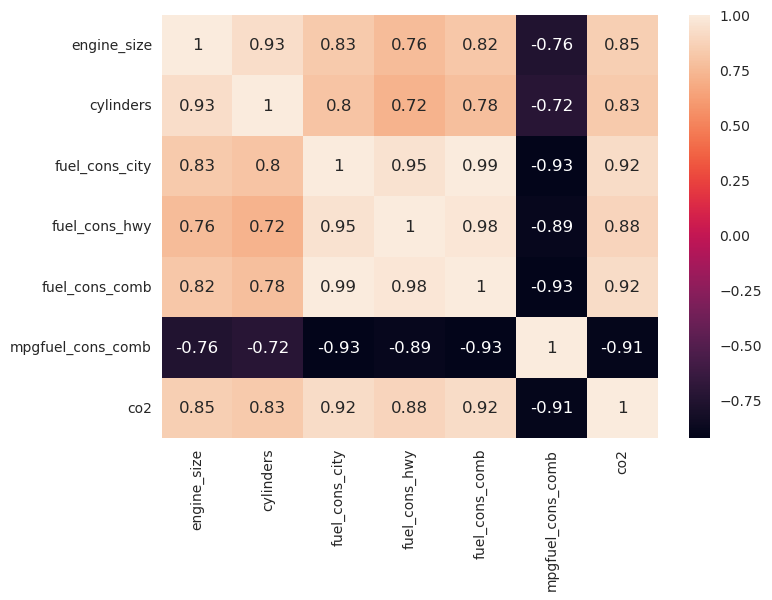

In [20]:
sns.heatmap(df.corr(), annot = True);

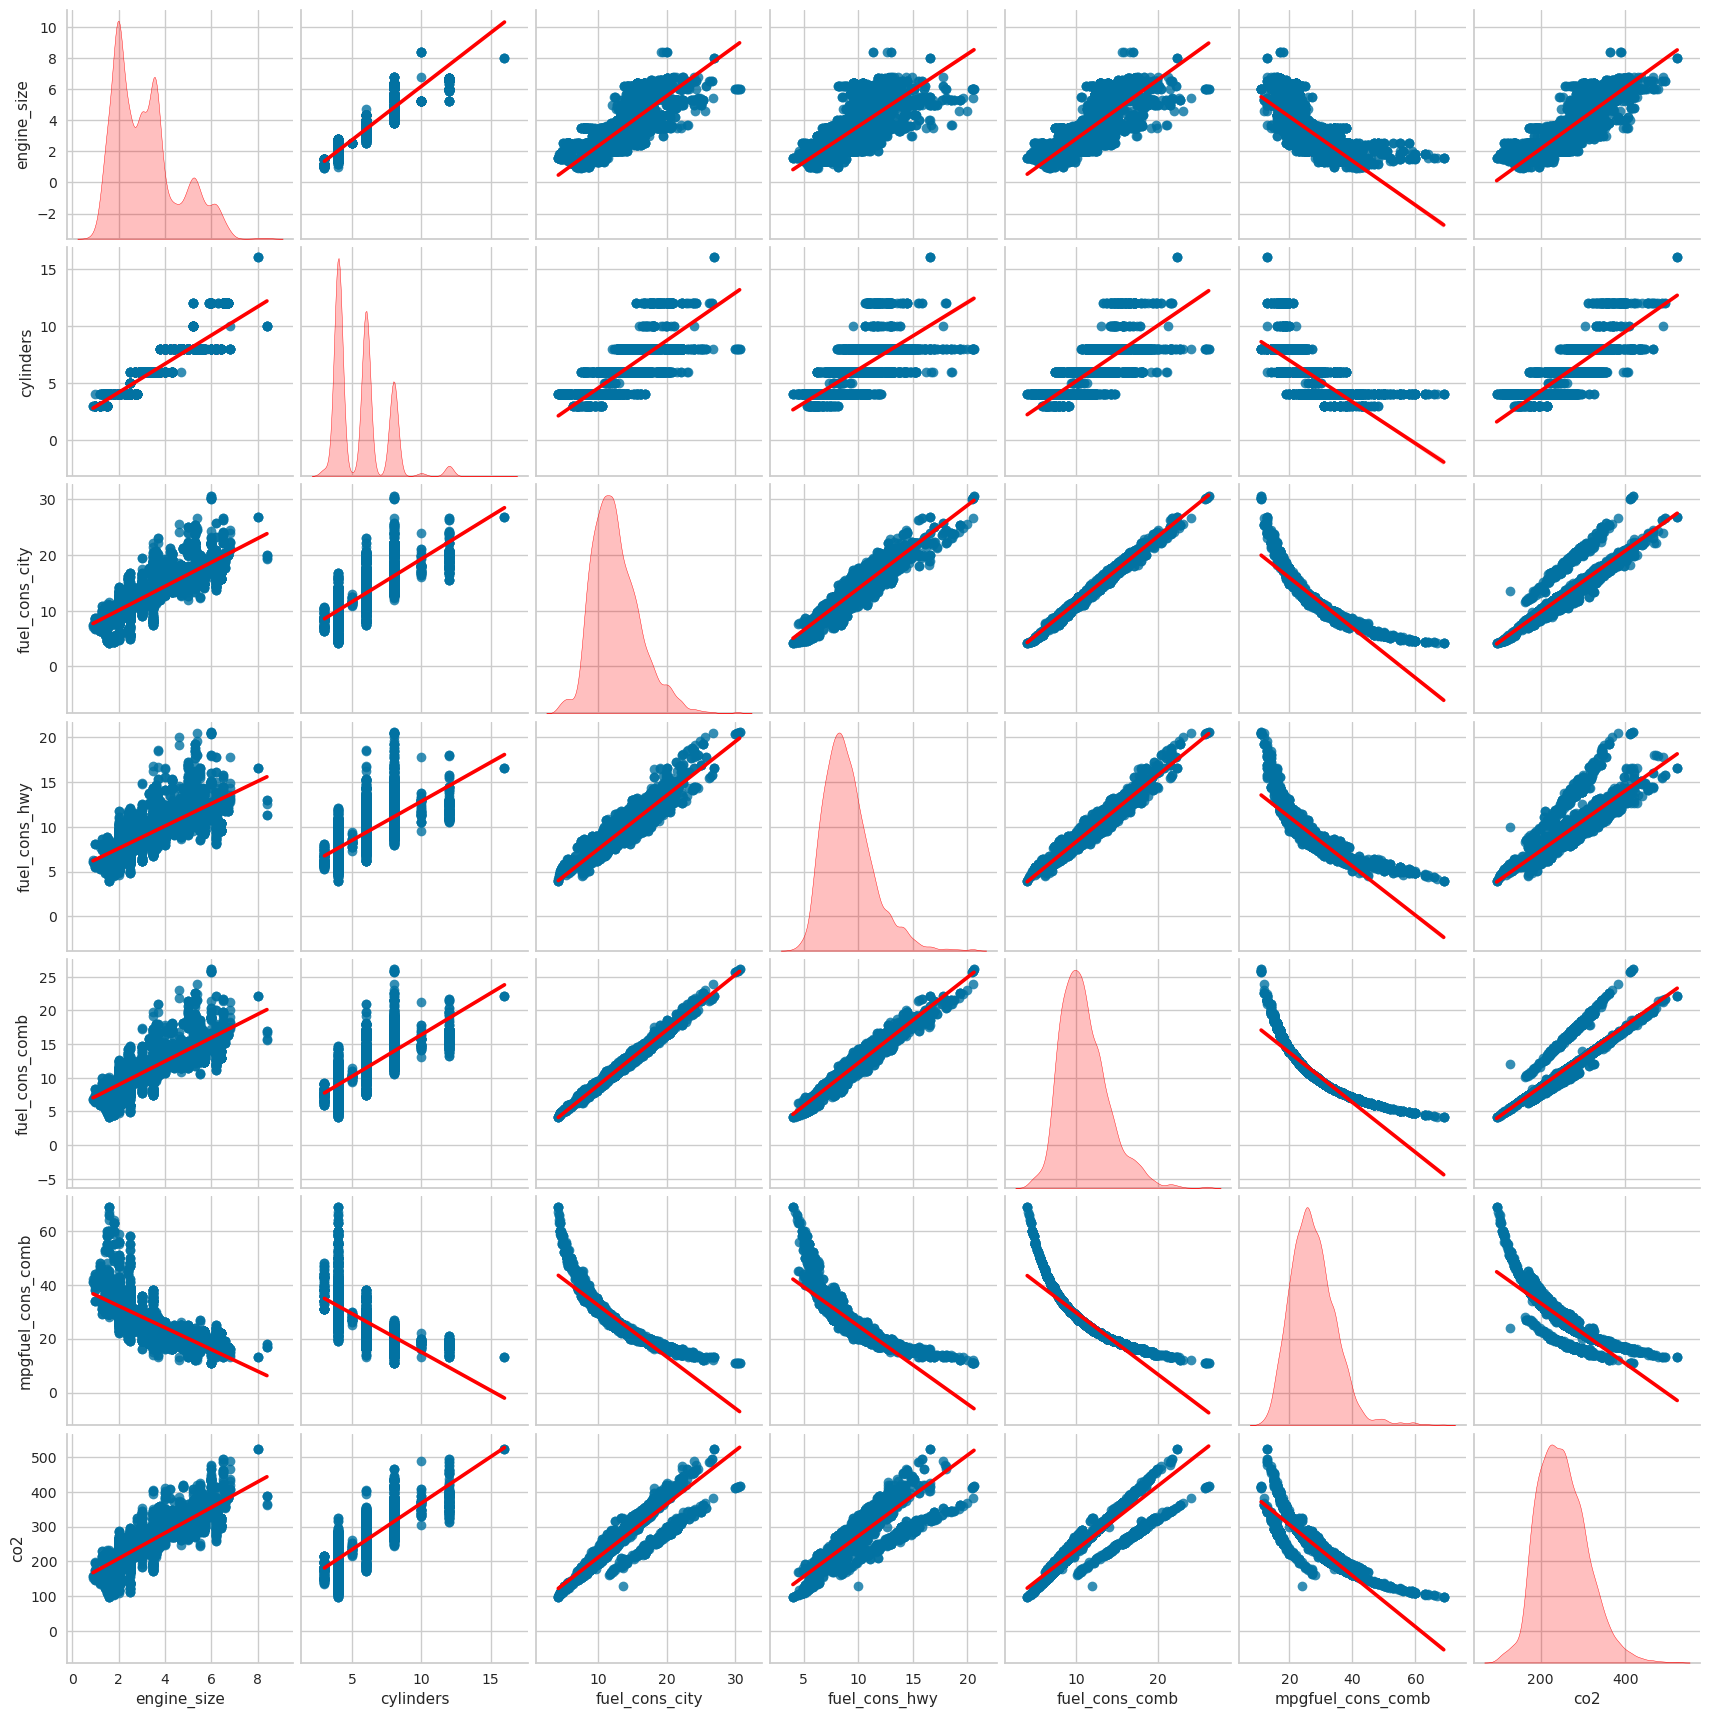

In [21]:
sns.pairplot(df, kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}});

## Outliers check

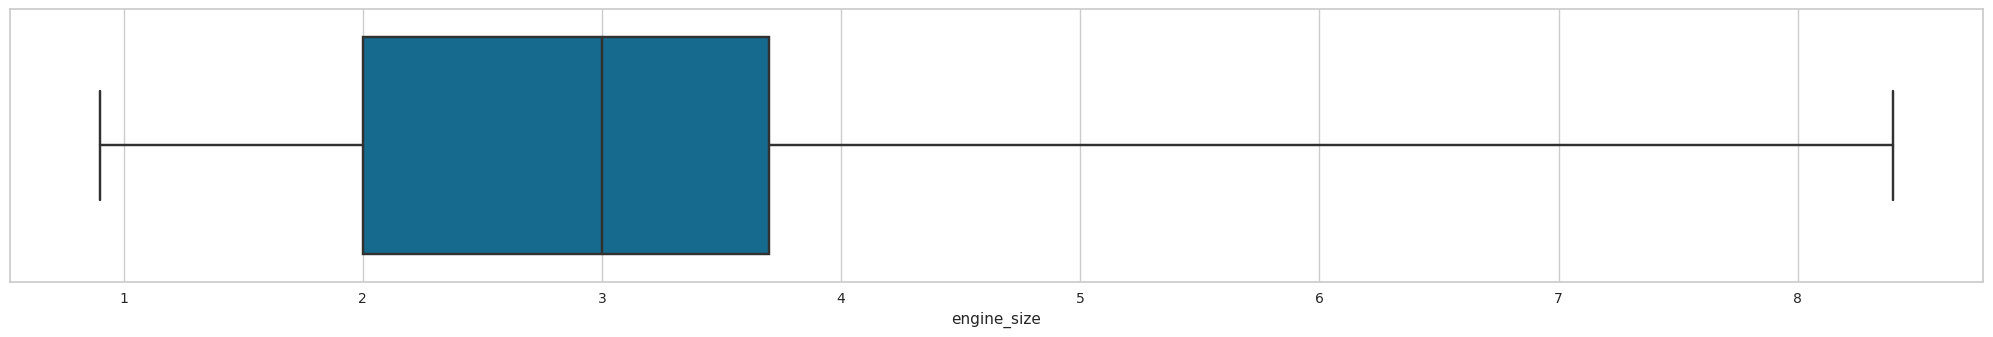

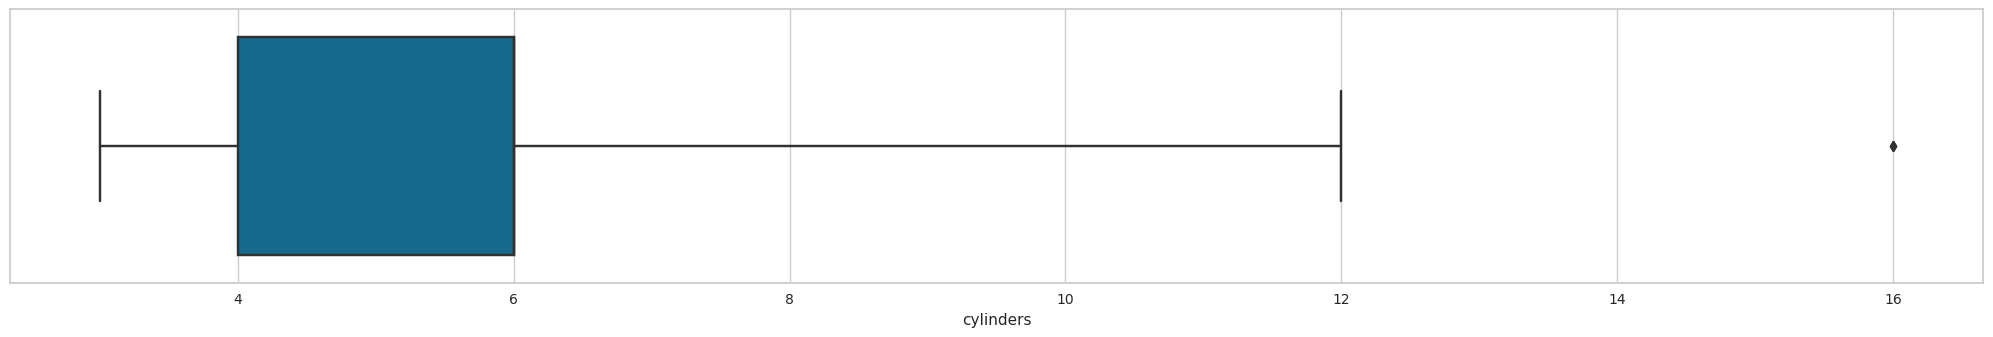

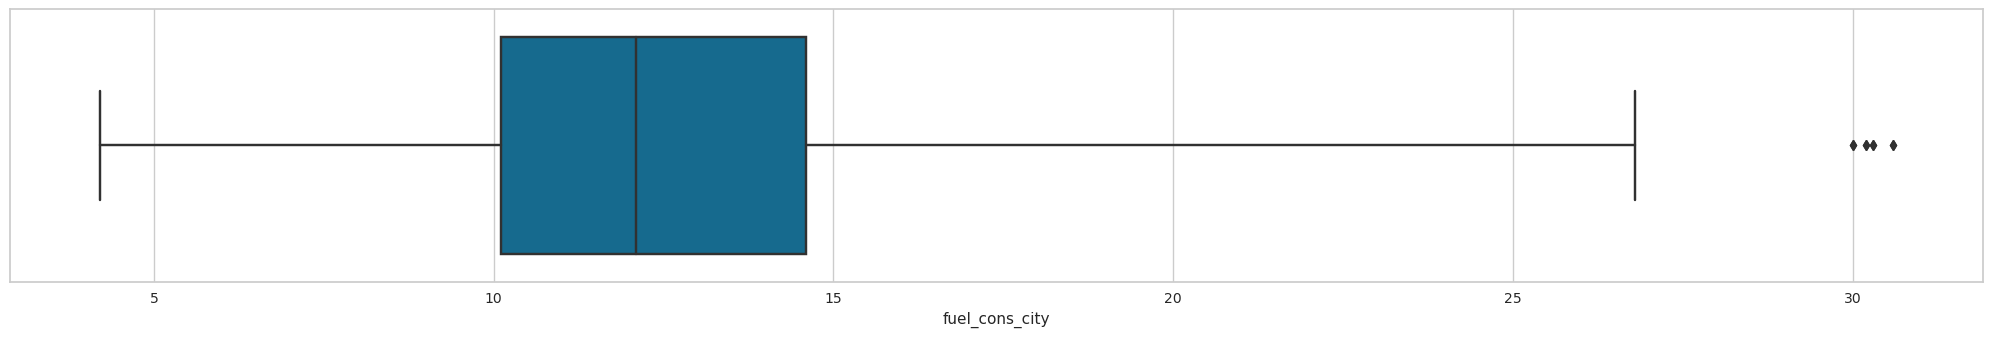

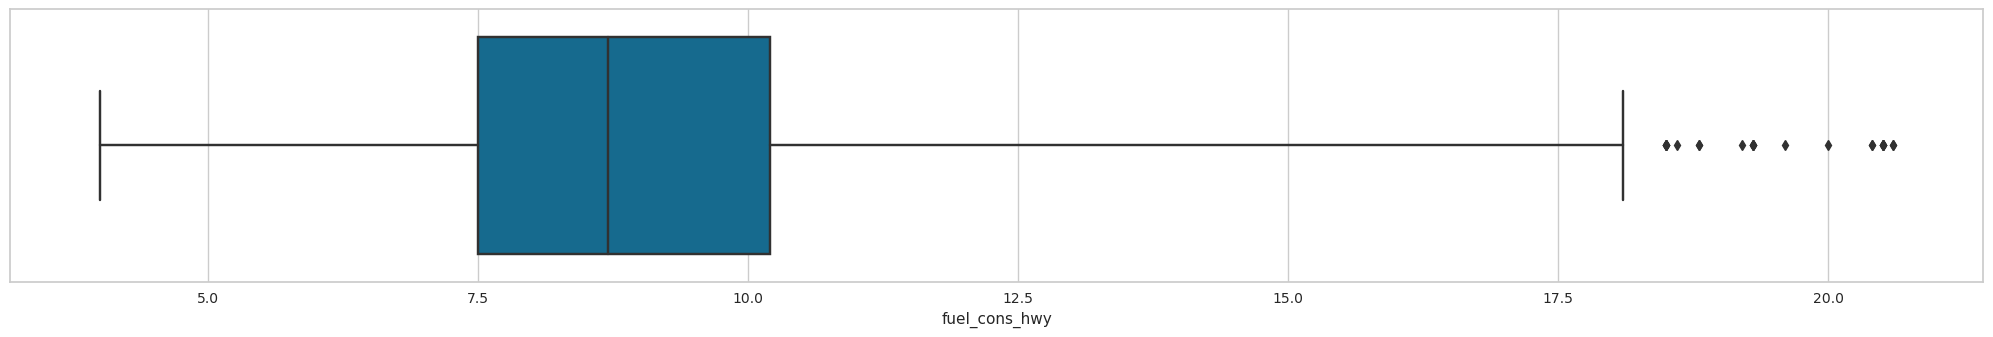

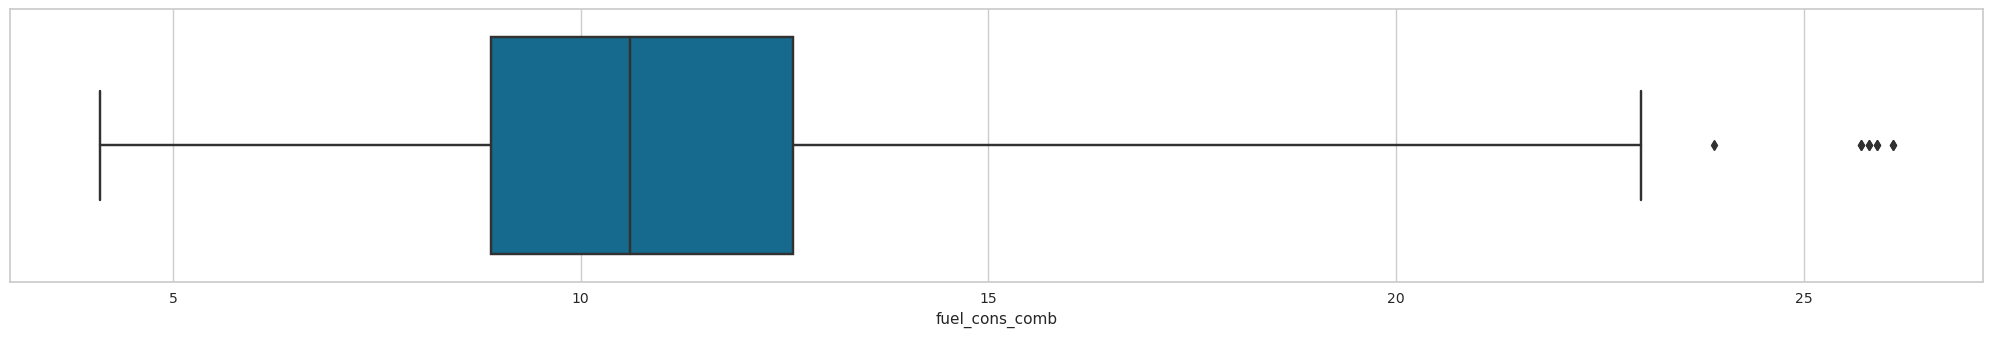

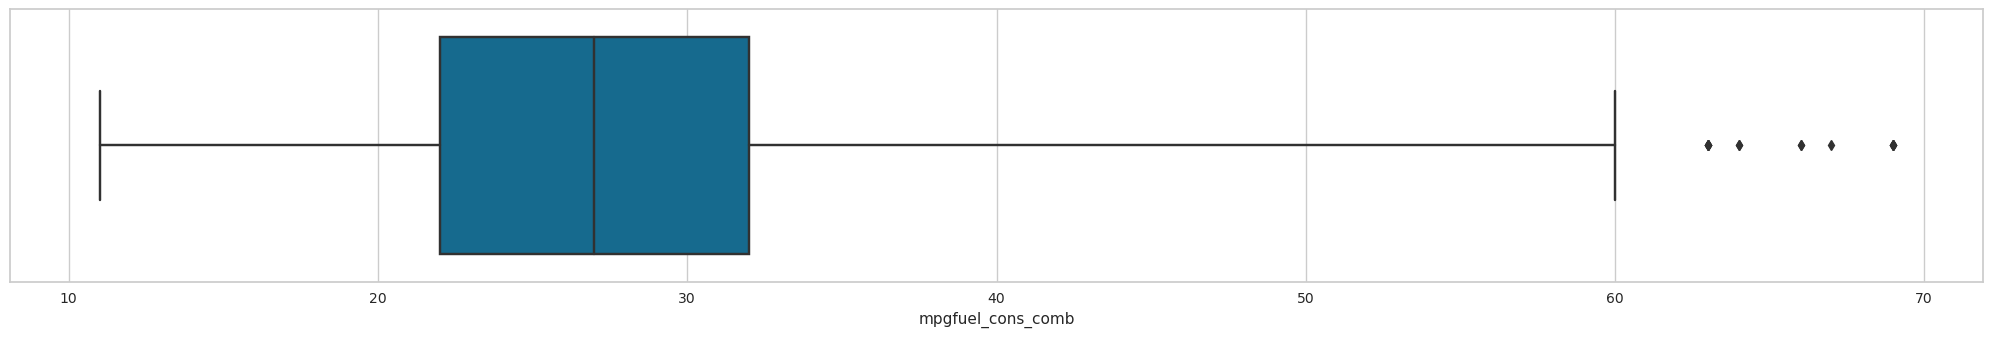

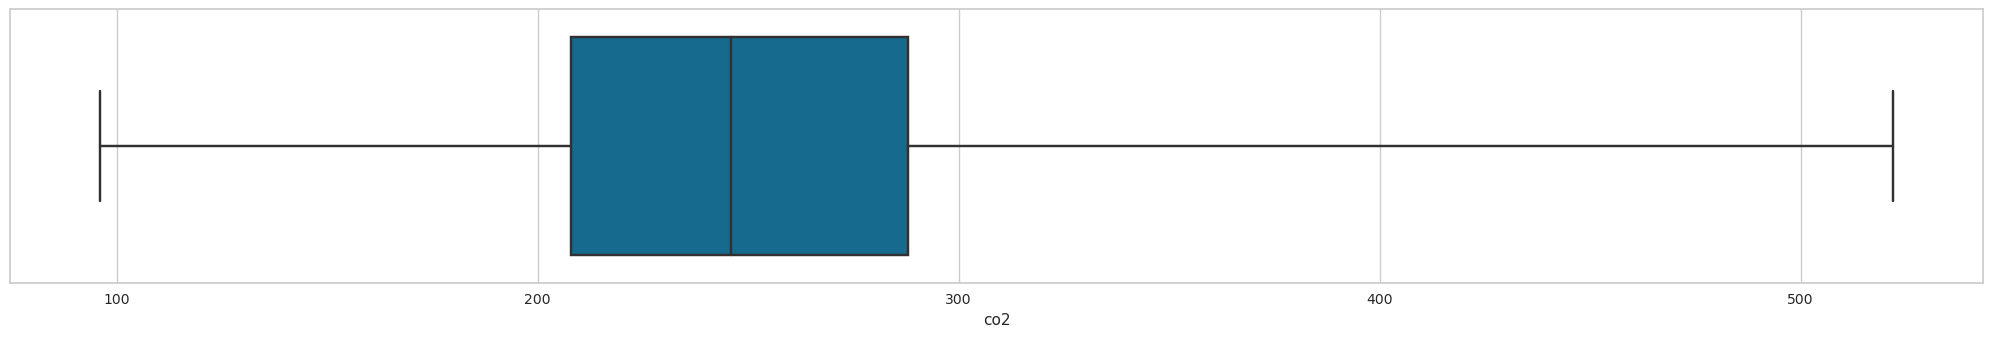

In [22]:
# Let's draw boxplots and histplots for checking distributions of features;
index=0
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(40,40))
    plt.subplot((len(df.columns)),2,index)
    sns.boxplot(x=feature,data=df,whis=3) 
        
    plt.tight_layout()
    
    plt.show()

## Data Visulisation

In [23]:
import plotly.graph_objs as go

In [24]:
for column in ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']:
    df_column = df[column].value_counts().reset_index().rename(columns={'index': column, column: 'Count'})[0:25]
    df_column = df_column.sort_values(by='Count', ascending=False)  # Değerlere göre sıralama yapiyoruz

    fig = go.Figure(go.Bar(x=df_column[column], y=df_column['Count'], 
                           marker={'color': df_column['Count'], 'colorscale': 'Viridis'}, 
                           text=df_column['Count'], textposition="outside"))
    fig.update_layout(title_text=f'Top 25 {column}', xaxis_title=column, yaxis_title='Number of Vehicles', 
                      title_x=0.5, width=700, height=500)
    fig.show()

In [25]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

In [26]:
def explore_cat_feature(feature):
    group= df.groupby(feature).mean()
    plt.figure(figsize=[15,5])
    plots = group['co2'].sort_values().plot(kind = 'bar', fontsize=15)
    plt.xlabel(feature, fontsize=15);
    plt.ylabel('Mean Co2 Emission', fontsize=15);
    plt.title("Mean Co2 Emission according to {} feature\n".format(feature), fontsize=20)

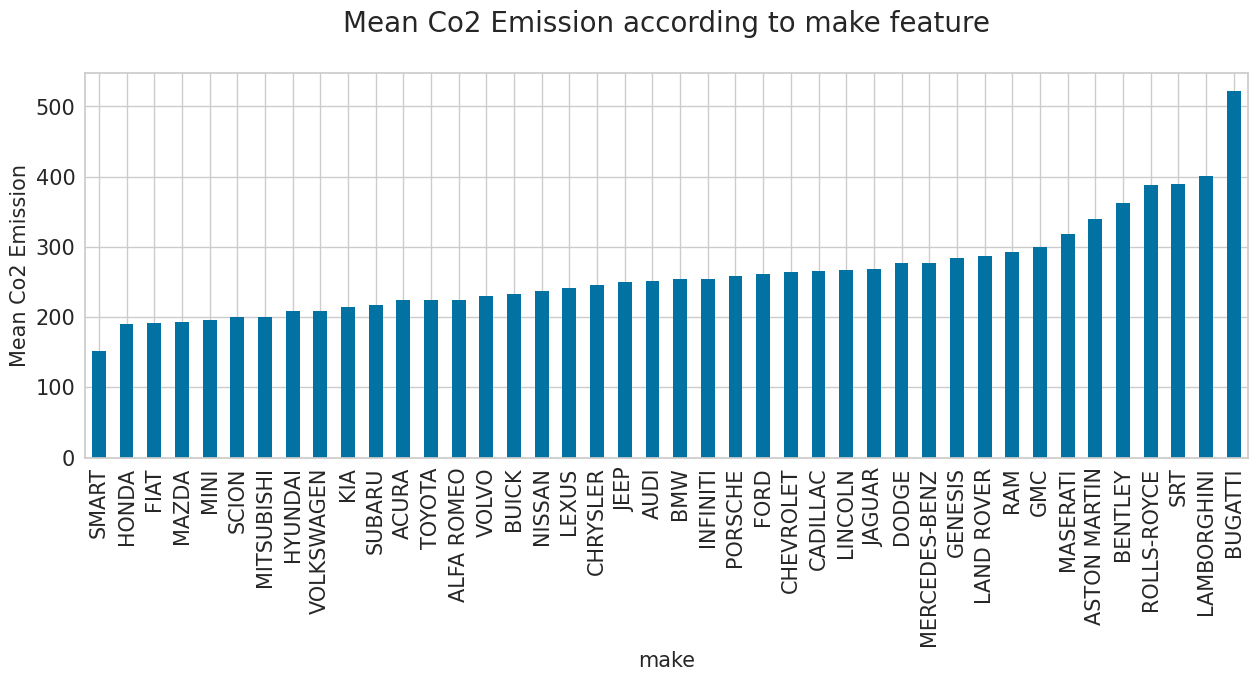

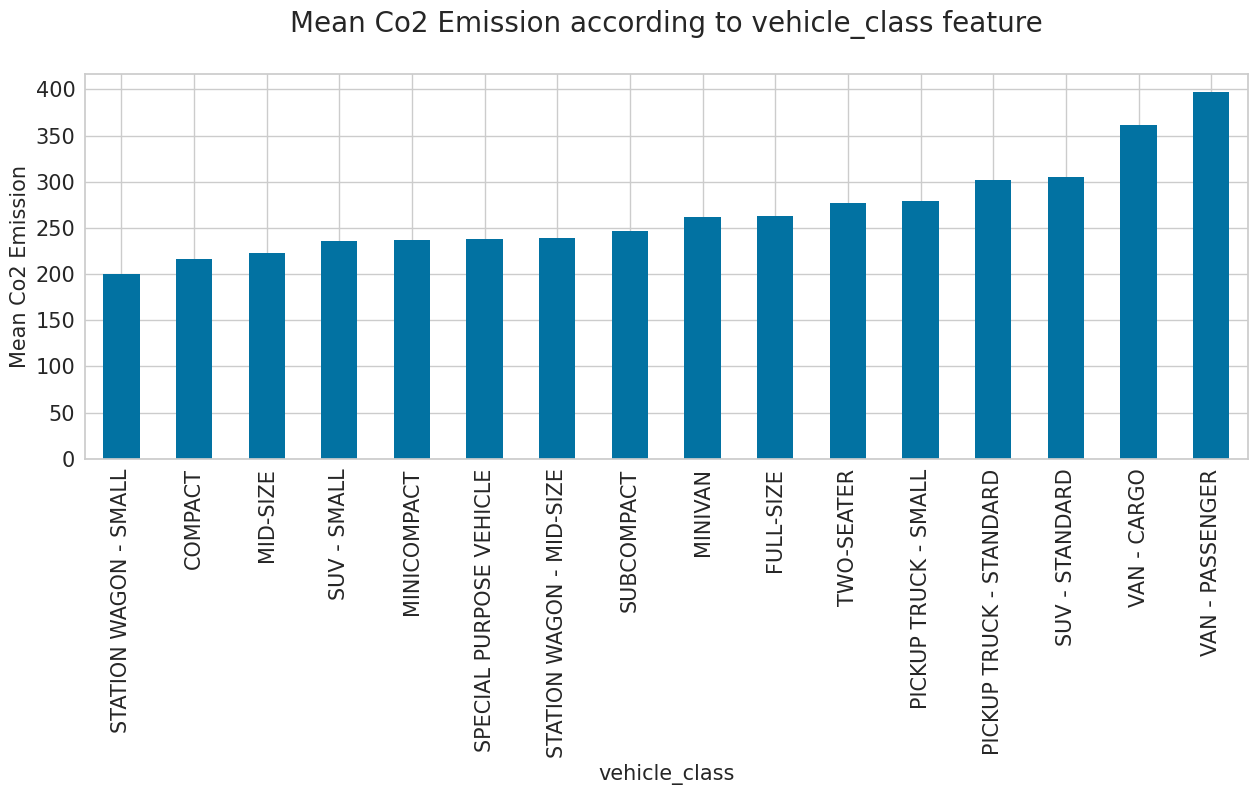

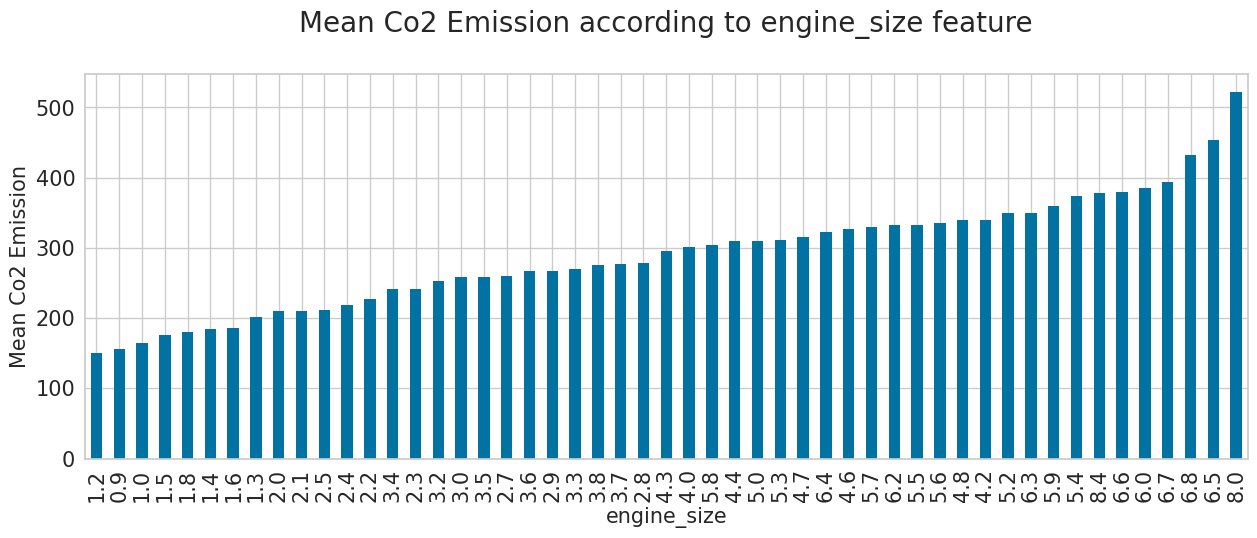

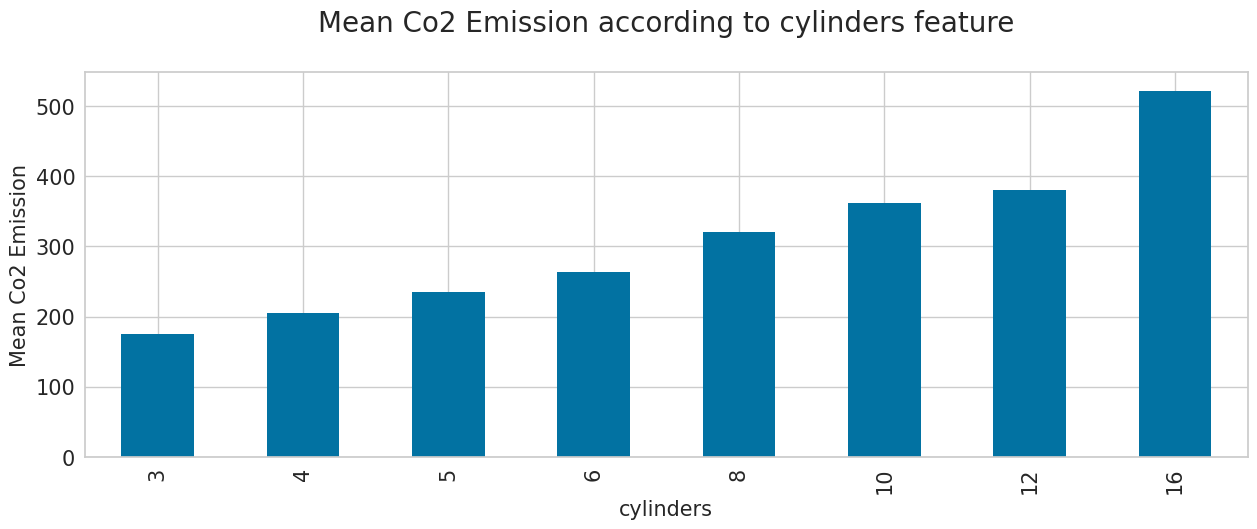

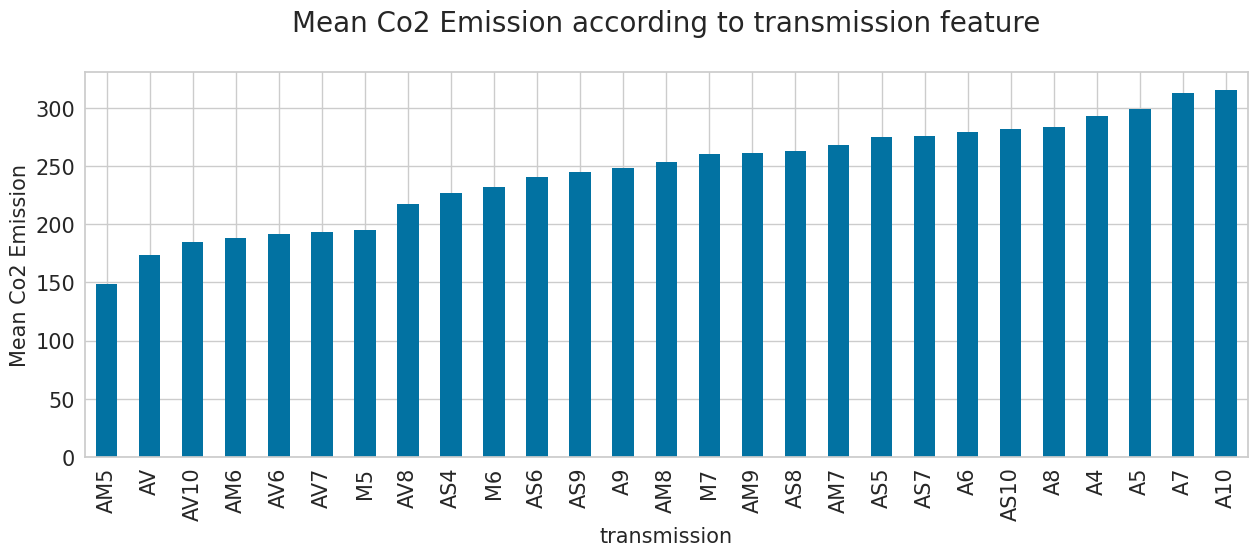

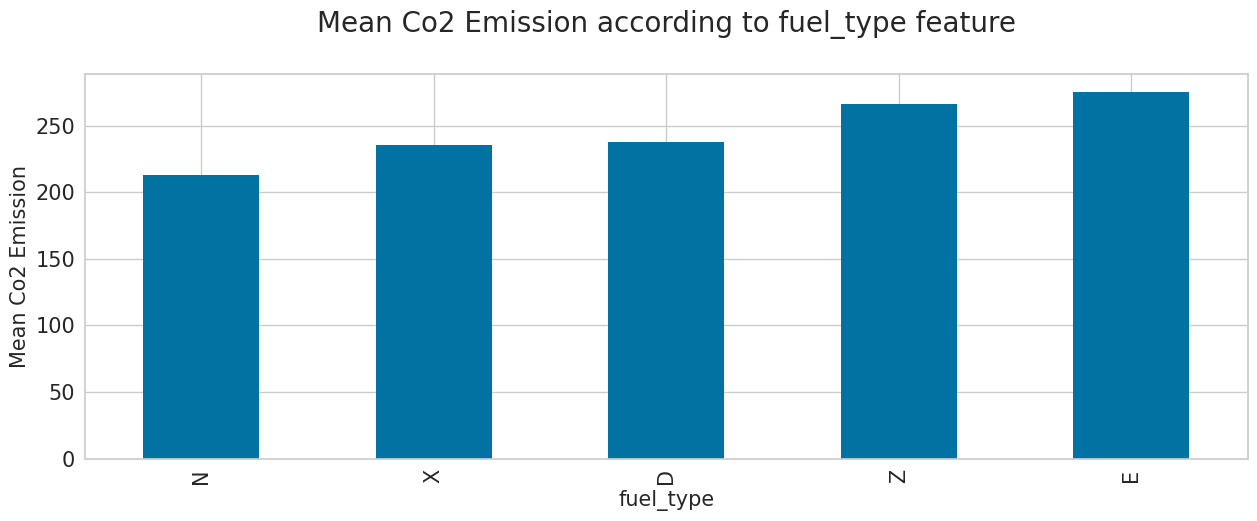

In [27]:
for feature in ['make', 'vehicle_class', 'engine_size', 'cylinders', 'transmission', 'fuel_type']:
    explore_cat_feature(feature)

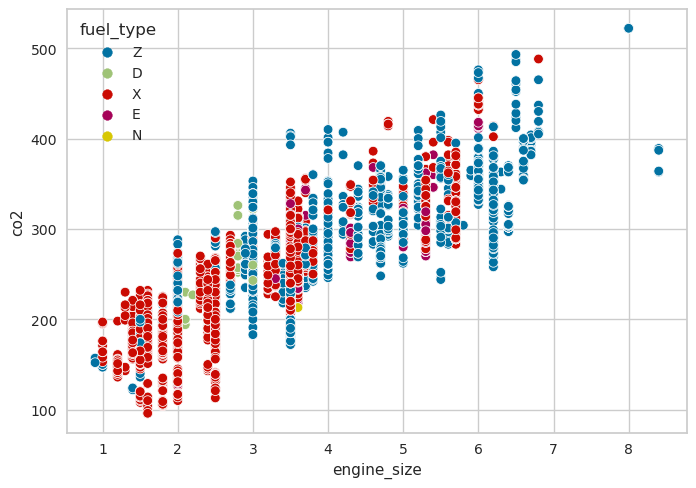

In [28]:
sns.scatterplot(x="engine_size", y="co2", data=df, hue="fuel_type");

# Machine Learning

## Labelling Dependent and Independent Variables

In [29]:
df.head(2)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [30]:
X = df[["cylinders","engine_size", "fuel_cons_city", "fuel_cons_hwy", "fuel_cons_comb"]]
y = df["co2"]

## Train Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Scaling Data

In [32]:
scaler.fit(X_train)

StandardScaler()

In [33]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.19894138,  0.2377329 ,  0.29257271,  0.33491996,  0.48722708],
       [ 1.28521278,  2.07862356,  2.6958375 ,  2.62873416,  2.70257844],
       [-0.88733003, -0.86680151, -0.76600821, -0.38470803, -0.62044861],
       ...,
       [ 1.28521278,  1.56317418,  0.80755803,  0.78468745,  0.79876086],
       [-0.88733003, -0.572259  ,  0.86477862,  0.78468745,  0.83337573],
       [-0.88733003, -0.572259  , -0.36546407, -0.29475453, -0.34352969]])

In [34]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.88733003, -0.572259  , -0.36546407,  0.19998971, -0.17045536],
       [-0.88733003, -0.86680151, -2.02486119, -1.50912676, -1.86658375],
       [ 0.19894138,  0.31136852,  0.63589625,  0.37989671,  0.55645681],
       ...,
       [ 1.28521278,  2.66770858,  2.75305809,  2.04403642,  2.52950411],
       [ 0.19894138, -0.13044524,  0.49284478,  0.60478045,  0.55645681],
       [-0.88733003, -1.30861527, -1.30960381, -1.14931276, -1.27813104]])

## Linear Regression

#### Training the Data

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
mlr = LinearRegression()

In [37]:
mlr.fit(X_train, y_train)

LinearRegression()

### Predicting Test Data

In [38]:
y_train_pred = mlr.predict(X_train)

y_pred = mlr.predict(X_test)

### Evaluating Model

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
def train_val(y_train, y_train_pred, y_test, y_pred, model_name): ## BİZ OLUŞTURDUK
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [41]:
mlr_score = train_val(y_train, y_train_pred, y_test, y_pred, "s_linear")
mlr_score 

,s_linear_train,s_linear_test
R2,0.880395,0.874039
mae,13.326264,13.349828
mse,411.734065,420.921008
rmse,20.291231,20.516360


### Residuals Chek (Normal dağılım varsa bir patern yoksa o zaman modelim doğrusaldır). Modelin doğrusal olduğunun kontrolü için)

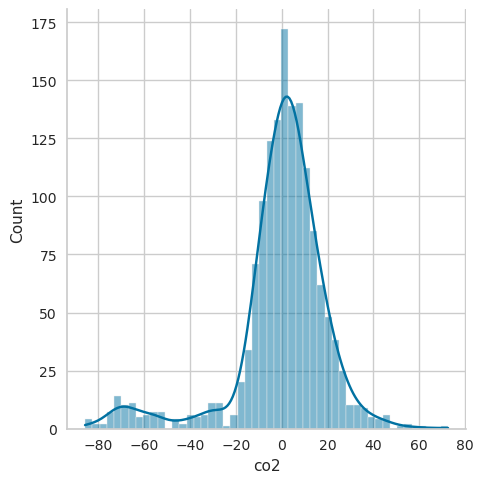

In [42]:
sns.displot((y_test-y_pred), bins=50, kde=True);

### Prediction Error for LinearRegression (tahmin hatalarının yellow brick kütüphanesi ile tespiti)

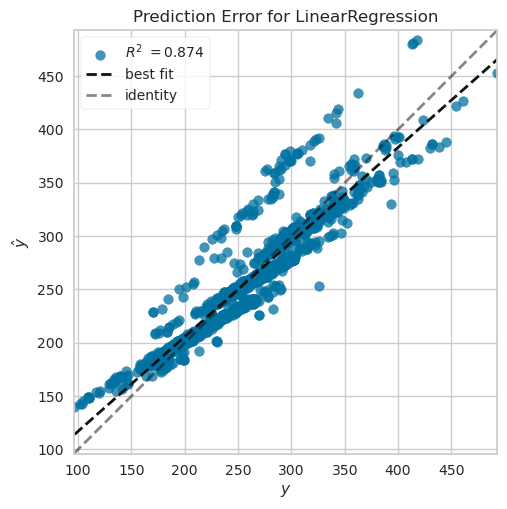

In [43]:
from yellowbrick.regressor import PredictionError

model = LinearRegression() 
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show(); 

### Cross Validate (Çapraz doğrulama r2, MAE, MSE, RMSE değerlerim gerçekten CV sonrası aldığım değerle uyumlu mu?)

In [44]:
from sklearn.model_selection import cross_validate, cross_val_score

In [45]:
model = LinearRegression()
mlr_cv_scores = cross_validate(model, X_train, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error'], cv = 10, return_train_score=True)

In [46]:
pd.DataFrame(mlr_cv_scores, index = range(1, 11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.005943,0.003398,0.871476,0.881296,-13.242225,-13.262870,-430.372350,-409.734920,-20.745418,-20.241910
2,0.010033,0.008450,0.877423,0.880703,-13.730840,-13.223786,-443.563716,-408.233426,-21.060952,-20.204787
3,0.010319,0.006500,0.864815,0.882098,-14.233930,-13.275844,-465.100834,-405.872853,-21.566197,-20.146286
4,0.009700,0.006594,0.897187,0.878522,-12.718566,-13.463922,-351.372963,-418.499524,-18.744945,-20.457261
5,0.011152,0.006787,0.875700,0.880795,-12.551697,-13.457782,-383.881186,-414.850923,-19.592886,-20.367890
6,0.010106,0.006806,0.885128,0.879819,-13.380061,-13.319129,-399.328419,-413.169254,-19.983203,-20.326565
7,0.010238,0.006757,0.889248,0.879324,-13.037328,-13.438994,-399.954611,-413.153820,-19.998865,-20.326186
8,0.010444,0.006669,0.889212,0.879384,-12.964542,-13.331905,-381.216417,-415.171701,-19.524764,-20.375763
9,0.011666,0.007471,0.875079,0.880918,-13.741059,-13.323323,-413.438509,-411.587951,-20.333187,-20.287630
10,0.012189,0.006958,0.872658,0.881230,-13.822515,-13.158236,-460.268876,-406.484627,-21.453878,-20.161464


In [50]:
mlr_cv_scores = pd.DataFrame(mlr_cv_scores, index=range(1, 11)) 
mlr_cv_scores.iloc[:, 2:].mean()

test_r2                                0.879793
train_r2                               0.880409
test_neg_mean_absolute_error         -13.342276
train_neg_mean_absolute_error        -13.325579
test_neg_mean_squared_error         -412.849788
train_neg_mean_squared_error        -411.675900
test_neg_root_mean_squared_error     -20.300430
train_neg_root_mean_squared_error    -20.289574
dtype: float64

### Ridge - L2

In [68]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

In [69]:
ridge_model = Ridge(alpha=1, random_state=42)

In [70]:
ridge_model.fit(X_train_scaled, y_train) #scale edilen X_train ve y_train fit ederiz

Ridge(alpha=1, random_state=42)

In [71]:
y_pred = ridge_model.predict(X_test_scaled)        
y_train_pred = ridge_model.predict(X_train_scaled)

In [72]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge") # train_val fonksiyonua tahmin ve testleri veriyoruz
rs

,ridge_train,ridge_test
R2,0.880390,0.874035
mae,13.328630,13.352598
mse,411.753595,420.936281
rmse,20.291712,20.516732


In [73]:
pd.concat([mlr_score, rs], axis = 1)

,s_linear_train,s_linear_test,ridge_train,ridge_test
R2,0.880395,0.874039,0.880390,0.874035
mae,13.326264,13.349828,13.328630,13.352598
mse,411.734065,420.921008,411.753595,420.936281
rmse,20.291231,20.516360,20.291712,20.516732


In [74]:
alpha_space = np.linspace(0.01, 1, 100) #bir kere oluştur her modelde kullan mantığıyla alpha space i oluşturduk
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [78]:
pd.DataFrame(scores, index = range(1, 11))

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [79]:
ridge_cv_model.alpha_

1.0

In [80]:
ridge_cv_model.best_score_

-20.298498999979522

In [81]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [82]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.880390,0.874035
mae,13.328630,13.352598
mse,411.753595,420.936281
rmse,20.291712,20.516732


In [83]:
pd.concat([mlr_score, rs, rcs], axis = 1)

,s_linear_train,s_linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.880395,0.874039,0.880390,0.874035,0.880390,0.874035
mae,13.326264,13.349828,13.328630,13.352598,13.328630,13.352598
mse,411.734065,420.921008,411.753595,420.936281,411.753595,420.936281
rmse,20.291231,20.516360,20.291712,20.516732,20.291712,20.516732


### Lasso - L1

In [86]:
from sklearn.linear_model import Lasso, LassoCV

In [87]:
#alpha space is defined already above between 0 and 1, 100 as 100 numbers like 0,01 and 0,02
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter=1000000, random_state= 42)

In [88]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=1000000, random_state=42)

In [89]:
lasso_cv_model.alpha_

0.09999999999999999

In [90]:
y_pred = lasso_cv_model.predict(X_test_scaled)   
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [91]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.880391,0.874077
mae,13.344363,13.363439
mse,411.749261,420.793605
rmse,20.291606,20.513254


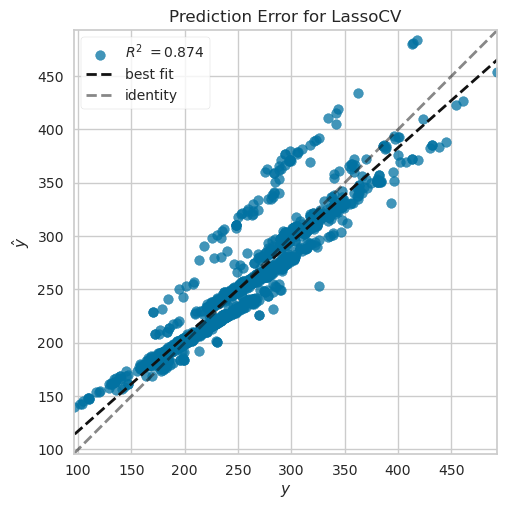

<Axes: title={'center': 'Prediction Error for LassoCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [92]:
model = LassoCV()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [93]:
pd.concat([mlr_score, rs, rcs, lcs], axis = 1)

,s_linear_train,s_linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test
R2,0.880395,0.874039,0.880390,0.874035,0.880390,0.874035,0.880391,0.874077
mae,13.326264,13.349828,13.328630,13.352598,13.328630,13.352598,13.344363,13.363439
mse,411.734065,420.921008,411.753595,420.936281,411.753595,420.936281,411.749261,420.793605
rmse,20.291231,20.516360,20.291712,20.516732,20.291712,20.516732,20.291606,20.513254


In [94]:
lasso_cv_model.coef_

array([12.12290797,  7.05941898,  7.06777683,  4.80859453, 26.89132209])

## Elastic Net

In [95]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [96]:
el_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, 
                                max_iter = 100000,random_state=42)

In [97]:
el_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [98]:
el_cv_model.l1_ratio_

1.0

In [99]:
el_cv_model.alpha_

0.09999999999999999

In [100]:
y_pred = el_cv_model.predict(X_test_scaled)
y_train_pred = el_cv_model.predict(X_train_scaled)

In [101]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.880391,0.874077
mae,13.344363,13.363439
mse,411.749261,420.793605
rmse,20.291606,20.513254


In [102]:
pd.concat([mlr_score, rs, rcs, lcs,ecs], axis = 1)

,s_linear_train,s_linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_cv_train,elastic_cv_test
R2,0.880395,0.874039,0.880390,0.874035,0.880390,0.874035,0.880391,0.874077,0.880391,0.874077
mae,13.326264,13.349828,13.328630,13.352598,13.328630,13.352598,13.344363,13.363439,13.344363,13.363439
mse,411.734065,420.921008,411.753595,420.936281,411.753595,420.936281,411.749261,420.793605,411.749261,420.793605
rmse,20.291231,20.516360,20.291712,20.516732,20.291712,20.516732,20.291606,20.513254,20.291606,20.513254


## Grid Search

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
elastic_model = ElasticNet(max_iter= 100000, random_state = 42)

In [105]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [106]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [107]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=100000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [108]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.5}

In [109]:
y_pred = grid_model.predict(X_test_scaled) 
y_train_pred = grid_model.predict(X_train_scaled)

In [110]:
gs= train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gs

,GridSearch_train,GridSearch_test
R2,0.880372,0.874068
mae,13.345778,13.368754
mse,411.815011,420.826266
rmse,20.293226,20.514050


In [111]:
grid_model.best_estimator_

ElasticNet(alpha=0.01, max_iter=100000, random_state=42)

In [112]:
pd.concat([mlr_score, rs, rcs, lcs,ecs,gs], axis = 1)

,s_linear_train,s_linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_cv_train,elastic_cv_test,GridSearch_train,GridSearch_test
R2,0.880395,0.874039,0.880390,0.874035,0.880390,0.874035,0.880391,0.874077,0.880391,0.874077,0.880372,0.874068
mae,13.326264,13.349828,13.328630,13.352598,13.328630,13.352598,13.344363,13.363439,13.344363,13.363439,13.345778,13.368754
mse,411.734065,420.921008,411.753595,420.936281,411.753595,420.936281,411.749261,420.793605,411.749261,420.793605,411.815011,420.826266
rmse,20.291231,20.516360,20.291712,20.516732,20.291712,20.516732,20.291606,20.513254,20.291606,20.513254,20.293226,20.514050


## Final Model

In [113]:
X = df[["cylinders","engine_size", "fuel_cons_city", "fuel_cons_hwy", "fuel_cons_comb"]]
y = df["co2"]

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
scaler.fit(X)

StandardScaler()

In [116]:
X_scaled = scaler.transform(X)
X_scaled

array([[-0.88340757, -0.85672099, -0.75900153, -1.05278069, -0.85574185],
       [-0.88340757, -0.5613172 , -0.3875769 , -0.60320221, -0.47542306],
       [-0.88340757, -1.22597573, -1.87327544, -1.45740132, -1.75467716],
       ...,
       [-0.88340757, -0.85672099, -0.24472127, -0.19858158, -0.23340202],
       [-0.88340757, -0.85672099, -0.3875769 , -0.33345513, -0.37169976],
       [-0.88340757, -0.85672099, -0.10186564, -0.15362374, -0.09510428]])

In [117]:
final_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)
final_model.fit(X_scaled,y)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=100000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [118]:
y_pred_final = final_model.predict(X_scaled)
y_pred_final

array([200.25262306, 217.67622336, 164.48598598, ..., 224.71321613,
       219.38148329, 229.173091  ])

In [119]:
my_dict = {"Actual": y, "pred": y_pred_final, "residual": y - y_pred_final}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
0,196,200.252623,-4.252623
1,221,217.676223,3.323777
2,136,164.485986,-28.485986
3,255,256.485108,-1.485108
4,244,249.818671,-5.818671
5,230,241.782124,-11.782124
6,232,243.566920,-11.566920
7,255,257.638074,-2.638074
8,267,264.740439,2.259561
9,212,212.351572,-0.351572


In [120]:
def eval_metric(Actual, pred):
    mae = mean_absolute_error(Actual, pred)
    mse = mean_squared_error(Actual, pred)
    rmse = np.sqrt(mean_squared_error(Actual, pred))
    R2_score = r2_score(Actual, pred)
    #print("Model testing performance: ")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [121]:
print("Model testing performance: ")
eval_metric(compare.Actual, compare.pred)

Model testing performance: 
--------------------------
R2_score 	: 0.8791708307103221
MAE 		: 13.44952388826036
MSE 		: 413.6308756055528
RMSE 		: 20.337917189465415


## Prediction

In [122]:
df.head(5)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [123]:
Cylinders = 4.0
engine_size = 2.0
fuel_cons_city = 9.9
fuel_cons_hwy = 6.7
fuel_cons_comb = 8.5

# olan aracin CO2 emisyonunu bulunuz.

X = np.array([[Cylinders,engine_size, fuel_cons_city, fuel_cons_hwy, fuel_cons_comb]])

X_scaled = scaler.transform(X)
X_scaled

CO2 = final_model.predict(X_scaled)

CO2 = np.squeeze(CO2).round(1)

print("CO2 emission of this car with 87% probability is", CO2, "g/Km.")

CO2 emission of this car with 87% probability is 200.3 g/Km.
